# Capstone Project EDA
## The 2016-2017 NBA Season

What's another disappointing season for an NBA squad? The staff and players still get paid. The draft will roll around soon and before you know it a whole new season will start, hopefully with a groundswell of support from the fans.  

From the outside looking in, this oversimplification is indeed how it appears. Life goes on, win or lose, for the fans and the players. After all, only so much blame for a disastrous season can go to the players themselves - they aren't the ones responsible for building the team and designing strategies. The team executives are, and to them winning and losing is of vital importance. Jobs are on the line every day for the coaches, scouts, video analysts, and executives who shape the makeup of their team. 

Identifying exactly what sets the winning teams apart from the losing teams and providing concrete examples of what needs to change could impact an organization at every level. Based on the results of an analysis you could tell an individual player to shoot more corner 3's, provide the coach with information that could help design higher-percentage plays, and assist the executives with finding players that fit the new plan.

This project will explore those questions and more, providing answers that would hopefully prove useful to an NBA team, or at least provide avenues that would be worth further investigation. For example, if a metric identifies a player on another team as above average in a certain category than more detailed analysis might be warranted to see if that player is worth pursuing in a trade or through free agency.

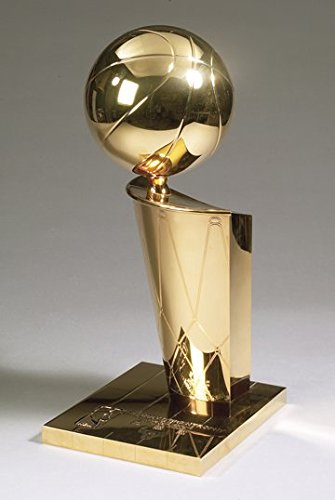

In [1]:
from IPython.display import Image

Image("trophy.jpg")

## My Perspective on the NBA and Basketball

I love basketball, have since I was a little kid. I grew up playing basketball and also going to Sacramento Kings games with my family. The feeling when a whole city rallies around their team is a special one that might be unique to professional sports. 

I am by no means an expert on the x's-and-o's of drawing up plays but I have formulated some opinions on how I think the game should be played. Basketball is first and foremost a team game. Crisp, fast passes on offense create open looks and driving lanes that the more isolation-focused teams struggle to emulate. On defense, the squad must communicate and be aware of what is happening around them. They have to help each other cover weaknesses and prevent those passes from opening the court up too much. 

The Golden State Warriors are a prime example. The 2016-2017 team was one of the best NBA teams ever. They pass the ball on offense and routinely get open looks. None of their players are particularly good individual defenders, but together they can get stops when they need to. I will draw attention to the Warriors in this exploration when their stats are noteworthy. I think most if not all teams could implement some of what the Warriors do, to improve their own play.

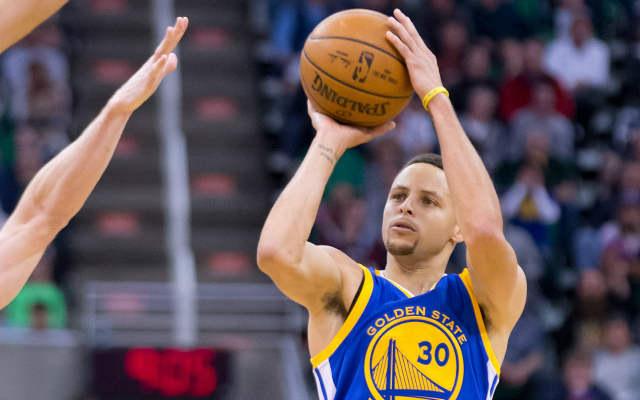

In [46]:
Image("curry.jpg")

## Total Wins by Team

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

The first dataset contains team boxscores from every game. Lets quickly take a look at the variables it holds. 

In [5]:
tbsdf = pd.DataFrame.from_csv('../../Cleaned_NBA_Season_Data/team_box_score_cleaned.csv')

In [6]:
pd.set_option('display.max_columns', 60)
tbsdf.head()

,DATE,TEAMS,VENUE,1Q,2Q,3Q,4Q,OT1,OT2,OT3,OT4,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,STARTING LINEUPS1,STARTING LINEUPS2,STARTING LINEUPS3,STARTING LINEUPS4,STARTING LINEUPS5
0,2016-10-25,New York,Road,18,27,19,24,NaN,NaN,NaN,NaN,88,240,32,87,9,27,15,20,13,29,42,17,22,6,18,18,6,88,100.4,100.4,87.7,116.6,3+,Carmelo Anthony,Kristaps Porzingis,Joakim Noah,Courtney Lee,Derrick Rose
1,2016-10-25,Cleveland,Home,28,20,34,35,NaN,NaN,NaN,NaN,117,240,45,94,13,35,14,19,11,40,51,31,22,12,14,15,5,117,100.4,100.4,116.6,87.7,3+,LeBron James,Kevin Love,Tristan Thompson,JR Smith,Kyrie Irving
2,2016-10-25,Utah,Road,26,20,37,21,NaN,NaN,NaN,NaN,104,240,40,82,8,24,16,16,6,25,31,19,19,9,11,14,5,104,92.5,92.5,112.4,122.1,3+,Joe Johnson,Boris Diaw,Rudy Gobert,Rodney Hood,George Hill
3,2016-10-25,Portland,Home,26,28,23,36,NaN,NaN,NaN,NaN,113,240,39,75,13,19,22,22,5,29,34,22,18,5,12,13,3,113,92.5,92.5,122.1,112.4,3+,Maurice Harkless,Al-Farouq Aminu,Mason Plumlee,CJ McCollum,Damian Lillard
4,2016-10-25,San Antonio,Road,31,33,33,32,NaN,NaN,NaN,NaN,129,240,47,98,12,24,23,26,21,34,55,25,19,13,13,14,3,129,98.8,98.8,130.6,101.2,3+,Kawhi Leonard,LaMarcus Aldridge,Pau Gasol,Kyle Anderson,Tony Parker


Two rows per game, one for each team. Noticeably absent is a column denoting which team actually won the game.

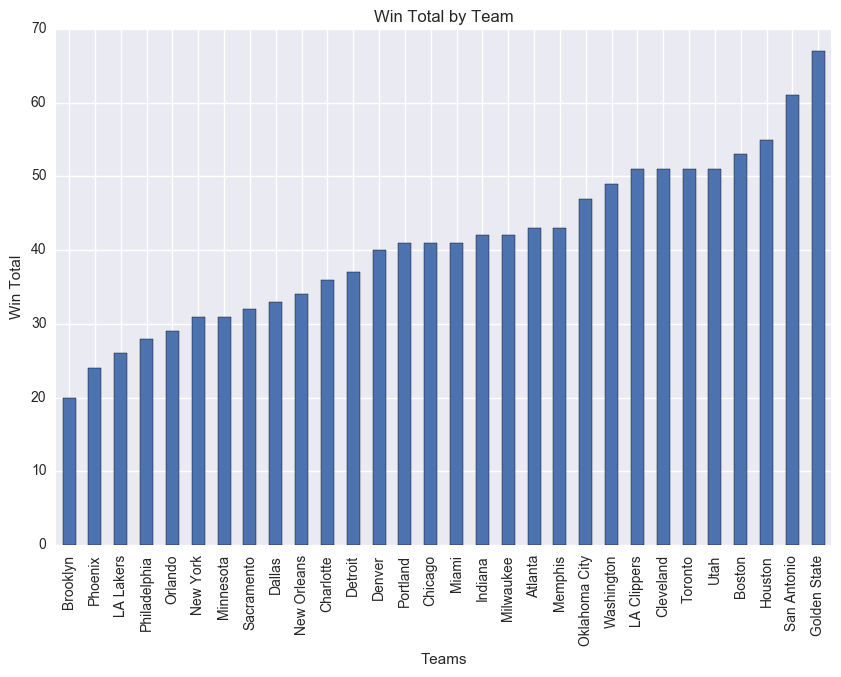

In [47]:
# add opponent scores to each row
tbsdf.loc[tbsdf['VENUE']=='Road', 'oppscore'] = tbsdf['F'].shift(-1)
tbsdf.loc[tbsdf['VENUE']=='Home', 'oppscore'] = tbsdf['F'].shift(1)

# function to do simple comparison of scores
def win_or_loss(row):
    if row['F'] > row['oppscore']:
        return 1
    else:
        return 0

# create win or loss column 
tbsdf['win_or_loss'] = tbsdf.apply(win_or_loss, axis=1)
wins_df = tbsdf['win_or_loss'].groupby(tbsdf['TEAMS']).sum().sort_values()

# create bar graph to show win totals by team
ax = wins_df.plot(kind='bar',
                 title='Win Total by Team',
                 figsize=(10,6.66),
                 legend=False)
ax.set_ylabel('Win Total')
ax.set_xlabel('Teams')

## Opponent's Field Goal Percentage by Team

One limitation of box score stats, especially for basketball, is that it is quite difficult to measure how well a team plays defense. For this exploration I will mostly be concerned with offensive performance - which mirrors the current NBA, where teams generally only need to play enough defense to outscore their opponent. Actually playing solid defense for a full 48 minutes is a nice goal, but few NBA teams actually make the effort to do that. 

That said, there is one defensive stat present in the data that I am curious about: opponent field goal percentage. 

In [11]:
# add opponent field goal percentage to each row
tbsdf.loc[tbsdf['VENUE']=='Road', 'opp_fgpct'] = tbsdf['FG'].shift(-1) / tbsdf['FGA'].shift(-1)
tbsdf.loc[tbsdf['VENUE']=='Home', 'opp_fgpct'] = tbsdf['FG'].shift(1) / tbsdf['FGA'].shift(1)

In [43]:
# create new dataframe to hold win totals and opponent fg percentage by team
fg_pct_df = tbsdf[['TEAMS', 'opp_fgpct', 'win_or_loss']]
fg_pct_df = fg_pct_df.groupby('TEAMS').agg({'opp_fgpct':'mean', 'win_or_loss':'sum'})[['opp_fgpct', 'win_or_loss']]

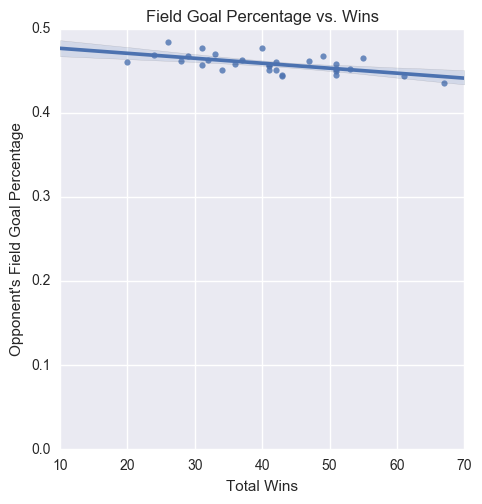

In [70]:
# create scatter plot 
ax = sns.lmplot('win_or_loss', 'opp_fgpct', data=fg_pct_df)

ax.set(ylim=(0.0,0.5), 
       xlabel='Total Wins',
       ylabel="Opponent's Field Goal Percentage",
       title='Field Goal Percentage vs. Wins')

Defense is clearly still a factor in winning games. The difference between the worst teams and best teams when it comes to average opponent's field goal percentage is quite small though, as seen by the regression line's slope being relatively low.

## Average Team Assists

One of the major offensive stats I am interested in is team assists. Passing the ball quickly around the court changes the flow of the game - it puts pressure on the defense to communicate, and rotate effectively. Maintaining this focus for a full game is probably not an easy task. 

I wouldn't say every team has a pass-first mentality on offense, but I would like to see how assists correlate with wins and I am using a team average because to really force the defense into difficult situations the entire team needs to be willing to pass. 

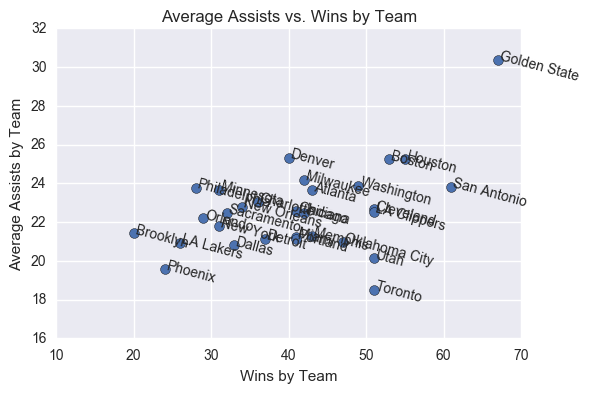

In [78]:
# create new dataframe with average assists, and team win counts
team_assists = tbsdf[['TEAMS', 'A', 'win_or_loss']]
team_assists = team_assists.groupby('TEAMS').agg({'A':'mean', 'win_or_loss':'sum'})[['A', 'win_or_loss']]

# create scatter plot 
ax = team_assists.plot('win_or_loss', 
                       'A', 
                       kind='scatter',
                       s=50)
ax.set_ylabel('Average Assists by Team')
ax.set_xlabel('Wins by Team')
ax.set_title('Average Assists vs. Wins by Team')

# add annotations to see which teams are the outliers
n=team_assists.index

for i, txt in enumerate(n):
    ax.annotate(txt, (team_assists.win_or_loss[i],team_assists.A[i]),rotation=-15)
plt.show()

This scatter plot was interesting. Toronto and Utah are two of the better teams in the league, but have relatively low assist averages given their win totals. Golden State was the other obivous outlier. During the 2016-2017 season the Warriors were one of the best teams in league history. Their assist average was by far the highest in the league. 

## Game Pace

The pace of the game is a measure of how many possessions were possible during a game. Shooting early in the shotclock, before 12 seconds are left out of 24, and aggressively pursuing fast break opportunities are two ways to increase the pace of the game. 

A faster pace has ramifications in many aspects of the game. As briefly outlined earlier in this report putting pressure on the defense is key to causing mistakes that lead to points. A faster pace can contribute to this. Other benefits of a faster pace are higher percentage shots, more transition chances, and the ability to go on scoring sprees (known as 'runs') that can put the game out of reach for the opponent. 

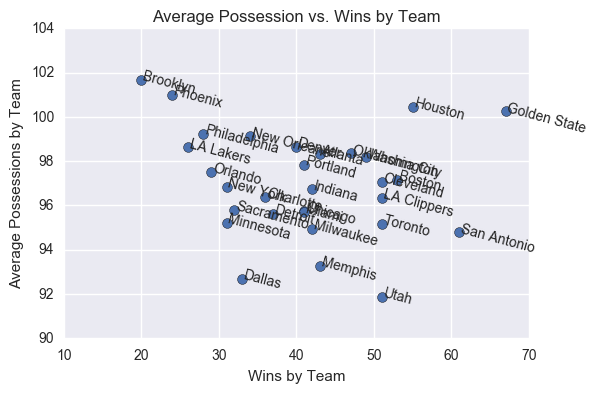

In [77]:
# create new dataframe to hold possession details, and wins
team_poss = tbsdf[['TEAMS', 'POSS', 'win_or_loss']]
team_poss = team_poss.groupby('TEAMS').agg({'POSS':'mean', 'win_or_loss':'sum'})[['POSS', 'win_or_loss']]

# create scatter plot 
ax = team_poss.plot('win_or_loss', 
                       'POSS', 
                       kind='scatter',
                       s=50)
ax.set_ylabel('Average Possessions by Team')
ax.set_xlabel('Wins by Team')
ax.set_title('Average Possession vs. Wins by Team')

# add annotations to see which teams are the outliers
n=team_poss.index

for i, txt in enumerate(n):
    ax.annotate(txt, (team_poss.win_or_loss[i],team_poss.POSS[i]),rotation=-15)
plt.show()

Not quite what I was expecting, but interesting none-the-less. Again, Golden State (and Houston, which is a very good team as well) have achieved success by playing at a high pace and racking up a lot of wins. From watching San Antonio I would have guessed they played at a higher pace then what the data shows. 

This plot really shows the different strategies each team uses. Brooklyn and Phoenix do not have talented rosters. I would hazard a guess that their coaches decided their best chance to win would be running the other team off the court. 

Teams like Memphis (that's Zach Randolph below playing defense) and Utah have some skilled players and more of a defensive mindset than most other teams, so playing at a slower pace might be beneficial to them.

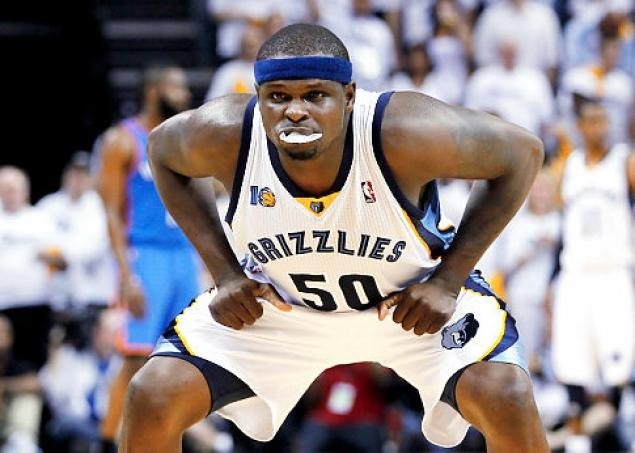

In [80]:
Image("zach.jpg")